In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import os
method = 'eval/csv/advs'
target_name = os.path.join(method,'target.csv' ) # 训练数据路径
source_name = os.path.join(method,'source.csv' )        # 读入训练数据，存成表
target = pd.read_csv(target_name)      
source = pd.read_csv(source_name) 
target= target.values                       # 取数据表中的值形成矩阵
target_feature = target[0:500,:-1]                       # 除去最后一列，形成特征矩阵
target_cls = target[0:500,-1]                       # 最后一列为标签矩阵

source= source.values                       # 取数据表中的值形成矩阵
source_feature = source[0:500,:-1]                       # 除去最后一列，形成特征矩阵
source_cls = source[0:500,-1]                          # 最后一列为标签矩阵

In [2]:
features_all = np.concatenate((target_feature,source_feature),axis = 0)
cls_all = np.concatenate((target_cls,source_cls),axis = 0)

In [3]:
tsne = TSNE(n_components=2,perplexity=30, n_iter=500, random_state=501)
X_tsne = tsne.fit_transform(features_all)
print("Org data dimension is {}. Embedded data dimension is {}".format(features_all.shape[-1], X_tsne.shape[-1]))
      
'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化



Org data dimension is 1024. Embedded data dimension is 2


In [4]:
tp,td,sp,sd = [],[],[],[]
for i in range(500):
    if int(cls_all[i]%2)==0:
        tp.append(X_norm[i])
    else:
        td.append(X_norm[i])
for i in range(500):
    if int(cls_all[i+500]%2)==0:
        sp.append(X_norm[i+500])
    else:
        sd.append(X_norm[i+500])  
tp = np.array(tp)
td = np.array(td)
sp = np.array(sp)
sd = np.array(sd)

In [5]:
len(sp)

274

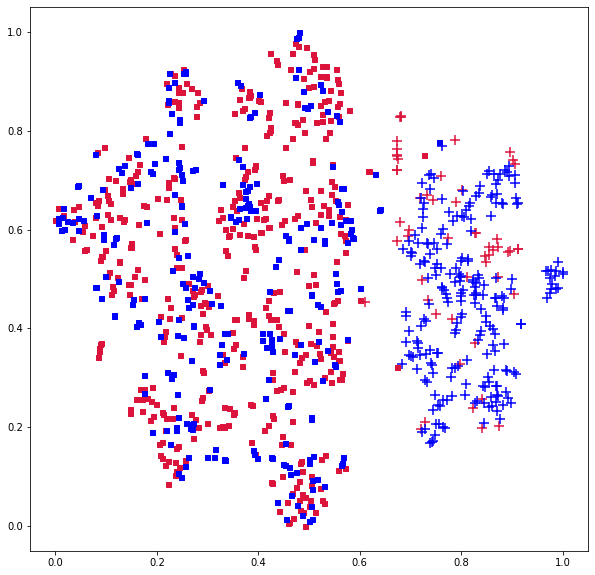

<Figure size 432x288 with 0 Axes>

In [7]:


plt.figure(figsize=(10, 10))
plt.scatter(tp[:, 0], tp[:, 1], s=25, c='#DC143C',marker = 's',label = 'target pointer')
plt.scatter(td[:, 0], td[:, 1], s=100, c='#DC143C',marker = '+',label = 'target digital')
plt.scatter(sp[:, 0], sp[:, 1], s=25, c='#0000FF',marker = 's',label = 'source pointer')
plt.scatter(sd[:, 0], sd[:, 1], s=100, c='#0000FF',marker = '+',label = 'source digital')
#plt.legend(fontsize=20,loc= 'upper right')
plt.show()
plt.savefig('eval/csv/tsne_advs.eps',dpi=600,format='eps')

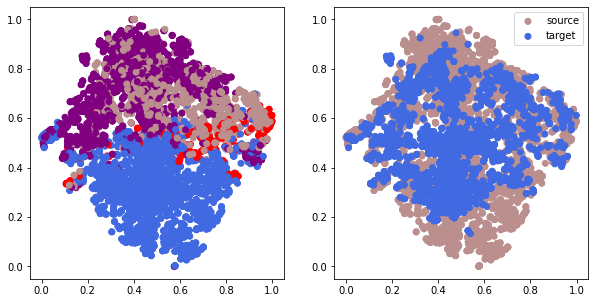

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=color_cls[:])
#plt.legend()
plt.subplot(122)
plt.scatter(X_norm[0:2875, 0], X_norm[0:2875, 1], c=color_domain[0:2875],label="source")
plt.scatter(X_norm[2875:-1, 0], X_norm[2875:-1, 1], c=color_domain[2875:-1],label="target")
plt.legend()
plt.show()

In [10]:
import torch
-2*0.5*torch.log(torch.tensor([0.5]))*2048*2/1000

tensor([2.8391])

In [11]:
1/2.83913*1.5

0.5283308619189682